In [4]:
!pip install catboost
!pip install optuna

  Using cached catboost-1.1.1-cp39-none-win_amd64.whl (74.0 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.9.4-py3-none-any.whl (210 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)


In [9]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-23.1.21-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached libclang-15.0.6.1-py2.py3-none-win_amd64.whl (23.2 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.30.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached grpcio-1.51.3-cp39-cp39-win_amd

In [10]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt   

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

from sklearn.metrics import f1_score
from catboost import CatBoostClassifier


import optuna
from optuna.samplers import TPESampler
from optuna import Trial

# from google.colab import drive  # GoodleDrive mount 
# drive.mount('/content/drive')

In [25]:
train_df = pd.read_csv('C://Users//user//OneDrive//open//train.csv')
test_df = pd.read_csv('C:/Users/user/OneDrive/open/test.csv')
submit = pd.read_csv('C:/Users/user/OneDrive/open/sample_submission.csv')

In [26]:
# train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [39]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])
# test_x = test_df

# 1.preprocessing
- Label Encoding
- Missing values fillna(0) 
- scaling: StandardScaler

In [40]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()    # TRY one-hot encoding 
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')  


Done.


In [41]:
# Missing Values 
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [70]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(train_x)
X_test_std = stdsc.transform(test_x)  

In [55]:
# X_train_std

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train_std, train_y,
                                                   test_size=0.3,
                                                   random_state=37)

# 2.Sequential Model

In [72]:
model = Sequential([
          Dense(512, activation='relu',input_shape=(2878,)),
          Dense(3, activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1474048   
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 1,475,587
Trainable params: 1,475,587
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
     
# X_train = pd.DataFrame(X_train).drop(columns=['X_1'])
history = model.fit(X_train_std,
                    train_y,
                    epochs=10,
                    batch_size=80,
                    validation_split=0.2) 




Epoch 1/10
6/6 [==============================] - 1s 53ms/step - loss: 4.3302 - accuracy: 0.5126 - val_loss: 3.4874 - val_accuracy: 0.5583
Epoch 2/10
6/6 [==============================] - 0s 37ms/step - loss: 2.5803 - accuracy: 0.5628 - val_loss: 3.9042 - val_accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 0s 38ms/step - loss: 2.7223 - accuracy: 0.6904 - val_loss: 3.2307 - val_accuracy: 0.6833
Epoch 4/10
6/6 [==============================] - 0s 34ms/step - loss: 1.6359 - accuracy: 0.6485 - val_loss: 2.7764 - val_accuracy: 0.6167
Epoch 5/10
6/6 [==============================] - 0s 30ms/step - loss: 1.4885 - accuracy: 0.7385 - val_loss: 1.5380 - val_accuracy: 0.6750
Epoch 6/10
6/6 [==============================] - 0s 31ms/step - loss: 0.9898 - accuracy: 0.6611 - val_loss: 2.0354 - val_accuracy: 0.6167
Epoch 7/10
6/6 [==============================] - 0s 42ms/step - loss: 1.2626 - accuracy: 0.7155 - val_loss: 1.7675 - val_accuracy: 0.6917
Epoch 8/10
6/6 [===========

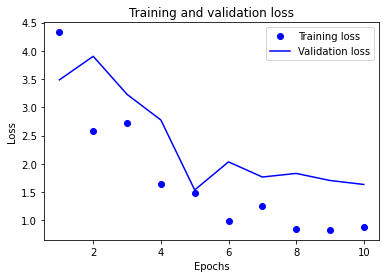

In [74]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()   
plt.show()

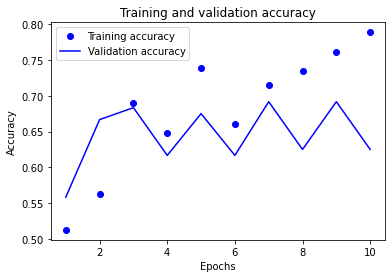

In [75]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 


In [76]:
X_train

array([[-0.85592158, -0.71324153, -1.17783182, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18187866,  0.46174038,  0.85784283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.46119267, -1.88822344, -1.17783182, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.67347484,  0.46174038, -0.1599945 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.34120702,  1.04923134,  0.85784283, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54919633, -1.30073248, -1.17783182, ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
X_test_std = stdsc.transform(test_x)    


In [ ]:

# a = pd.DataFrame(test_x.iloc[:,-1:])
# test_x = pd.concat([test_x ,a ])

In [78]:
preds = model.predict(X_test_std)

preds

ValueError: in user code:

    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\.anaconda\navigator\logs\anaconda(CAU) install\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 2878), found shape=(None, 2877)


In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')  

submit['Y_Class'] = preds 
submit.to_csv('smartFactory_submission17.csv', index=False)  

In [ ]:
submit['Y_Class'] = preds
     

submit.to_csv('C:/Users/user/OneDrive/open/mid_submission-MLP.csv', index=False)
# submit.to_csv('mid_submission-MLP.csv', index=False)

# 3.catBoost classifier 

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(train_x, train_y,
                                                   test_size=0.3,
                                                   random_state=37)
     

def objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')
     
# hyper-parameter tuning with OPTUNA  
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=316)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10)

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ",trial.params)

In [ ]:
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

In [ ]:
import pickle
pickle.dump(model, open("catboost_model.pkl", "wb"))
     

optuna.visualization.plot_optimization_history(study)
     

optuna.visualization.plot_parallel_coordinate(study)
     

# 각 파라미터들의 상관관계
optuna.visualization.plot_contour(
    study,
    params=[
        "iterations",
        "learning_rate",
        "depth",
        "l2_leaf_reg",
        "bootstrap_type",
        "random_strength",
        "bagging_temperature",
        "od_type",
        "od_wait"
        ],
)

In [ ]:
# 하이퍼파라미터 중요도
optuna.visualization.plot_param_importances(study)

In [ ]:
preds = model.predict(test_x)
     

preds

In [ ]:
submit = pd.read_csv('C:/Users/user/OneDrive/open/sample_submission.csv')
submit['Y_Class'] = preds

submit.to_csv('C:/Users/user/OneDrive/open/smartFactory_submission_MLP.csv', index=False)
# submit.to_csv('smartFactory_submission.csv', index=False)

In [ ]:
# BEST OUTPUT 
# a = pd.read_csv('C:/Users/user/Downloads/smartFactory_submission18.csv')
# sns.countplot(x='Y_Class', data=a)